## Visualize and compare results

This nodebook is to compare the results of 
- our NN implementation using cross validation and **grid search**
- our NN implementation using cross validation and **local search**
- an existing NN implementation MLPClassifier with default parameters using cross validation
- RandomForest with robust scaling, holdout and no feature selection (which is the best classification model from the previous assignment)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load the results

In [2]:
cv_grid_search_results = pd.read_csv('./results/cv_grid_search_results.csv')
cv_grid_search_results.head()

,Hidden Layer Sizes,Activation Function,Learning Rate,Batch Size,Number of Epochs,Average Accuracy,Average F1,Average Training Time,dataset
0,[5],tanh,0.0100,64,10,0.894397,0.895211,0.084876,cong_voting
1,[5],tanh,0.0010,64,10,0.299683,0.308408,0.057200,cong_voting
2,[5],tanh,0.0001,64,10,0.207294,0.219716,0.061325,cong_voting
3,[5],relu,0.0100,64,10,0.903700,0.904608,0.064944,cong_voting
4,[5],relu,0.0010,64,10,0.331501,0.337874,0.051408,cong_voting


In [3]:
cv_local_search_results = pd.read_csv('./results/cv_local_search_results.csv')
cv_grid_search_results.head()

,Hidden Layer Sizes,Activation Function,Learning Rate,Batch Size,Number of Epochs,Average Accuracy,Average F1,Average Training Time,dataset
0,[5],tanh,0.0100,64,10,0.894397,0.895211,0.084876,cong_voting
1,[5],tanh,0.0010,64,10,0.299683,0.308408,0.057200,cong_voting
2,[5],tanh,0.0001,64,10,0.207294,0.219716,0.061325,cong_voting
3,[5],relu,0.0100,64,10,0.903700,0.904608,0.064944,cong_voting
4,[5],relu,0.0010,64,10,0.331501,0.337874,0.051408,cong_voting


In [4]:
mlp_results = pd.read_csv('./results/MLP.csv')
mlp_results = mlp_results.drop(mlp_results.columns[0], axis=1)
mlp_results = mlp_results.replace('congression_voting', 'cong_voting')
mlp_results.head()

,method,dataset,Average F1,Average Training Time
0,MLP,wine_quality,0.467770,1.773693
1,MLP,cong_voting,0.949067,0.597549
2,MLP,bank_marketing,0.864294,2.533217


In [5]:
random_forest_results = pd.read_csv('./results/traditional_results.csv')
random_forest_results = random_forest_results.replace('congression_voting', 'cong_voting')
random_forest_results.head()

,method,dataset,Average F1,Average Training Time
0,RandomForest,wine_quality,0.653514,1.491498
1,RandomForest,cong_voting,0.954380,0.163212
2,RandomForest,bank_marketing,0.875507,3.346496


### Grid search results

In [6]:
cv_grid_search_results['Num Hidden Layers'] = cv_grid_search_results['Hidden Layer Sizes'].apply(lambda x: len(eval(x)))
#cv_grid_search_results = cv_grid_search_results.rename(columns={'Training Time': 'Average Training Time'})

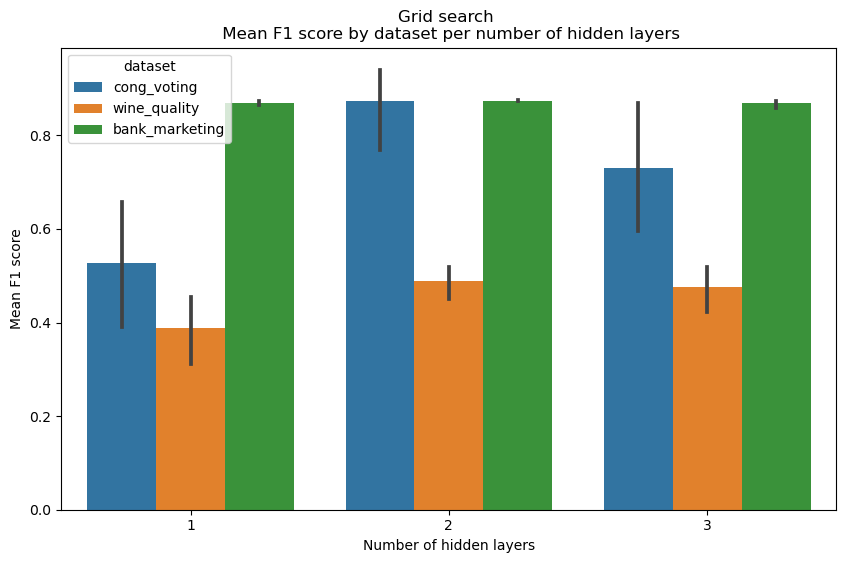

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Num Hidden Layers', y='Average F1', hue='dataset', data=cv_grid_search_results)

plt.xlabel('Number of hidden layers')
plt.ylabel('Mean F1 score')
plt.title('Grid search \n Mean F1 score by dataset per number of hidden layers')
plt.savefig('results_plots/gridsearch_f1_dataset_hiddenlayers.png')
plt.show()

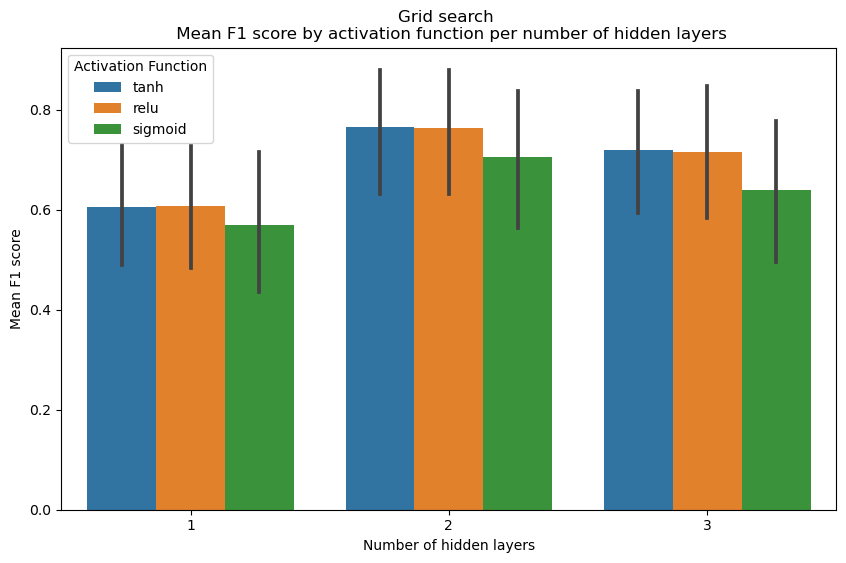

In [8]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Num Hidden Layers', y='Average F1', hue='Activation Function', data=cv_grid_search_results)

plt.xlabel('Number of hidden layers')
plt.ylabel('Mean F1 score')
plt.title('Grid search \n Mean F1 score by activation function per number of hidden layers')
plt.savefig('results_plots/gridsearch_f1_activation_hiddenlayers.png')
plt.show()


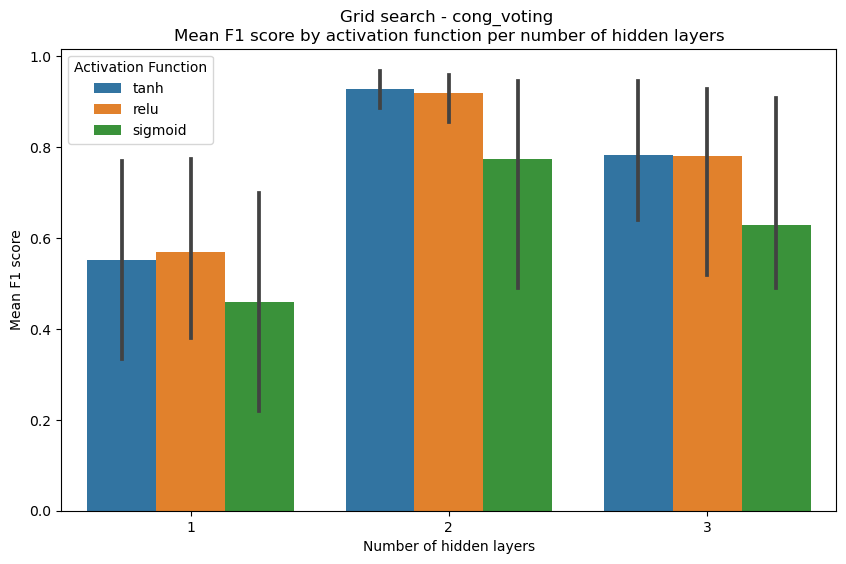

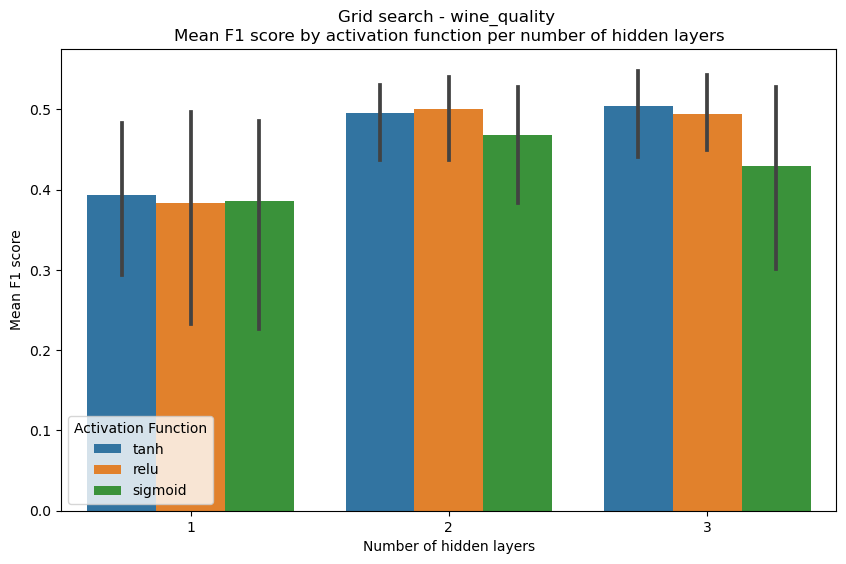

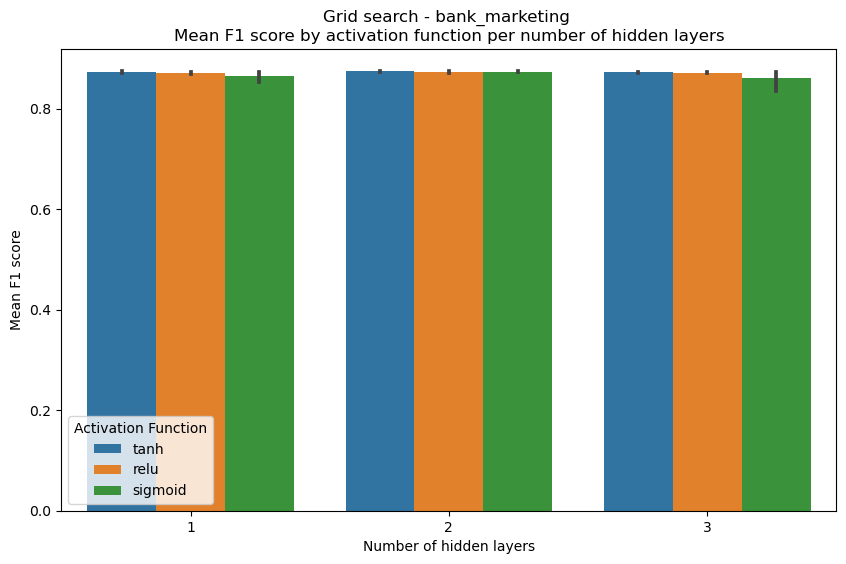

In [9]:
# This is similar as the one above but here it's per dataset

datasets = cv_grid_search_results['dataset'].unique()

for dataset in datasets:
    plt.figure(figsize=(10, 6))
    
    subset_data = cv_grid_search_results[cv_grid_search_results['dataset'] == dataset]

    sns.barplot(x='Num Hidden Layers', y='Average F1', hue='Activation Function', data=subset_data)
    
    plt.xlabel('Number of hidden layers')
    plt.ylabel('Mean F1 score')
    plt.title(f'Grid search - {dataset} \nMean F1 score by activation function per number of hidden layers')
    plt.savefig(f'results_plots/gridsearch_f1_activation_hiddenlayers_{dataset}.png')
    plt.show()
    


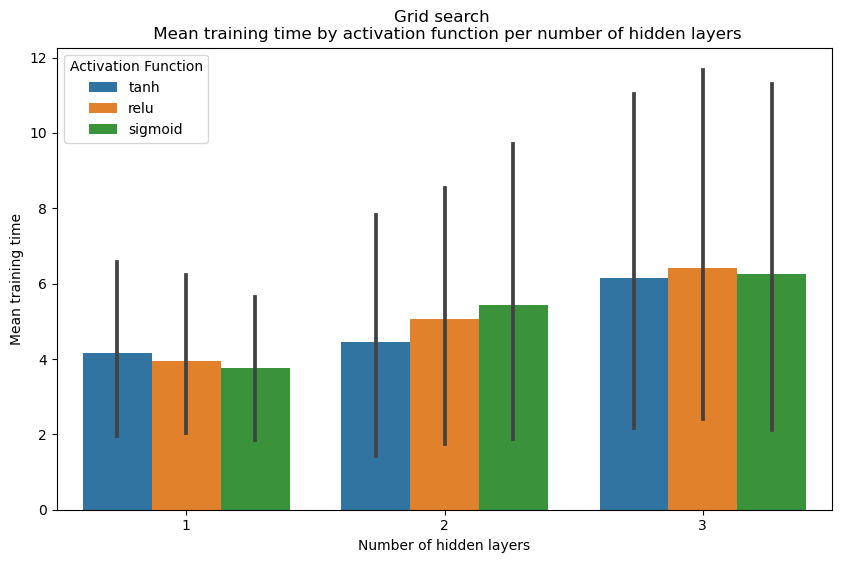

In [10]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Num Hidden Layers', y='Average Training Time', hue='Activation Function', data=cv_grid_search_results)

plt.xlabel('Number of hidden layers')
plt.ylabel('Mean training time')
plt.title('Grid search \n Mean training time by activation function per number of hidden layers')
plt.savefig(f'results_plots/gridsearch_time_activation_hiddenlayers_{dataset}.png')
plt.show()


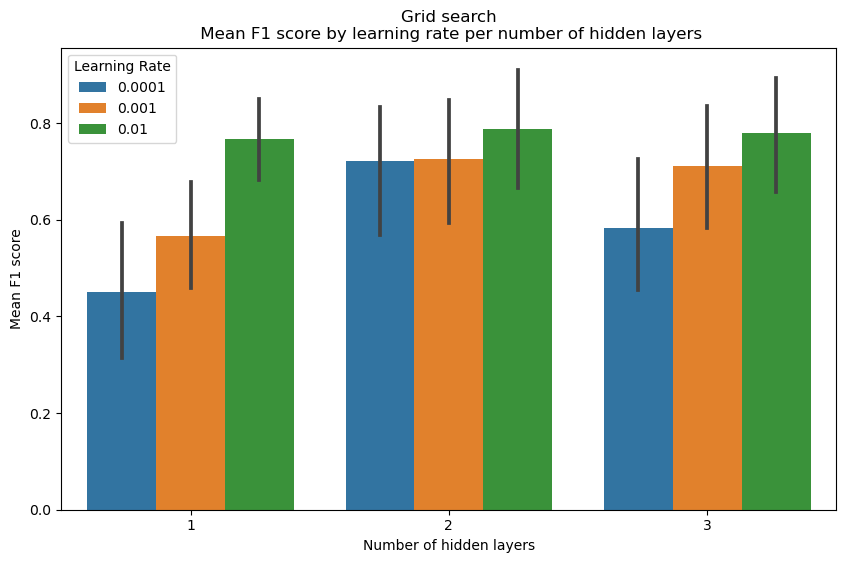

In [11]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Num Hidden Layers', y='Average F1', hue='Learning Rate', data=cv_grid_search_results)

plt.xlabel('Number of hidden layers')
plt.ylabel('Mean F1 score')
plt.title('Grid search\n Mean F1 score by learning rate per number of hidden layers')
plt.savefig('results_plots/gridsearch_f1_learning_hiddenlayers.png')
plt.show()


In [12]:
cv_grid_search_results.head()

,Hidden Layer Sizes,Activation Function,Learning Rate,Batch Size,Number of Epochs,Average Accuracy,Average F1,Average Training Time,dataset,Num Hidden Layers
0,[5],tanh,0.0100,64,10,0.894397,0.895211,0.084876,cong_voting,1
1,[5],tanh,0.0010,64,10,0.299683,0.308408,0.057200,cong_voting,1
2,[5],tanh,0.0001,64,10,0.207294,0.219716,0.061325,cong_voting,1
3,[5],relu,0.0100,64,10,0.903700,0.904608,0.064944,cong_voting,1
4,[5],relu,0.0010,64,10,0.331501,0.337874,0.051408,cong_voting,1


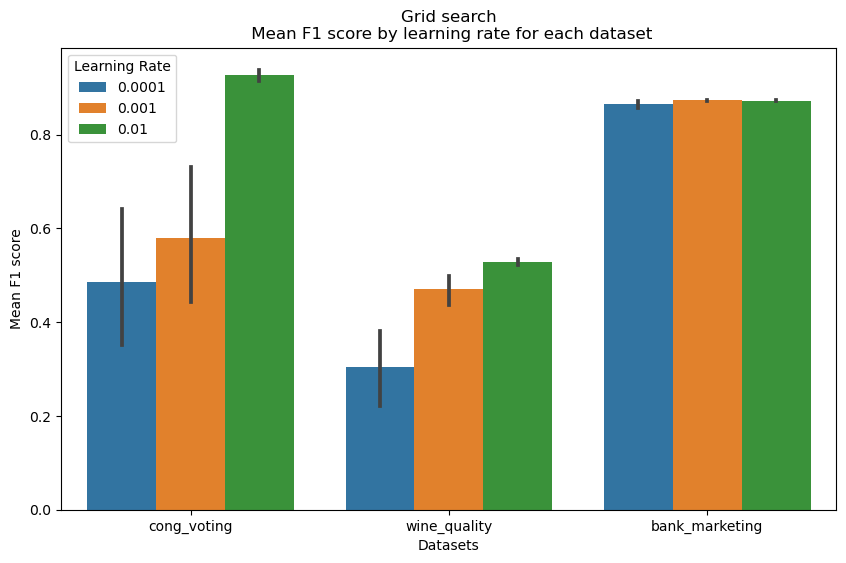

In [13]:
plt.figure(figsize=(10, 6))

sns.barplot(x='dataset', y='Average F1', hue='Learning Rate', data=cv_grid_search_results)

plt.xlabel('Datasets')
plt.ylabel('Mean F1 score')
plt.title('Grid search\n Mean F1 score by learning rate for each dataset')
plt.savefig('results_plots/gridsearch_f1_learning_datasets.png')
plt.show()


### Local search results

In [14]:
cv_local_search_results['Num Hidden Layers'] = cv_local_search_results['Hidden Layer Sizes'].apply(lambda x: len(eval(x)))

In [15]:
cv_local_search_results.head()

,Hidden Layer Sizes,Activation Function,Learning Rate,Batch Size,Number of Epochs,Average Accuracy,Average F1,Average Training Time,dataset,Num Hidden Layers
0,"[24, 30]",sigmoid,0.013762,64,11,0.558105,0.526884,2.165981,wine_quality,2
1,"[24, 31]",tanh,0.022259,32,12,0.550563,0.526648,5.264510,wine_quality,2
2,"[23, 31]",tanh,0.023461,128,11,0.546254,0.527366,1.851085,wine_quality,2
3,"[23, 32]",relu,0.012282,32,13,0.561802,0.544837,4.951335,wine_quality,2
4,"[22, 33]",relu,0.018211,32,14,0.549642,0.526481,6.234913,wine_quality,2


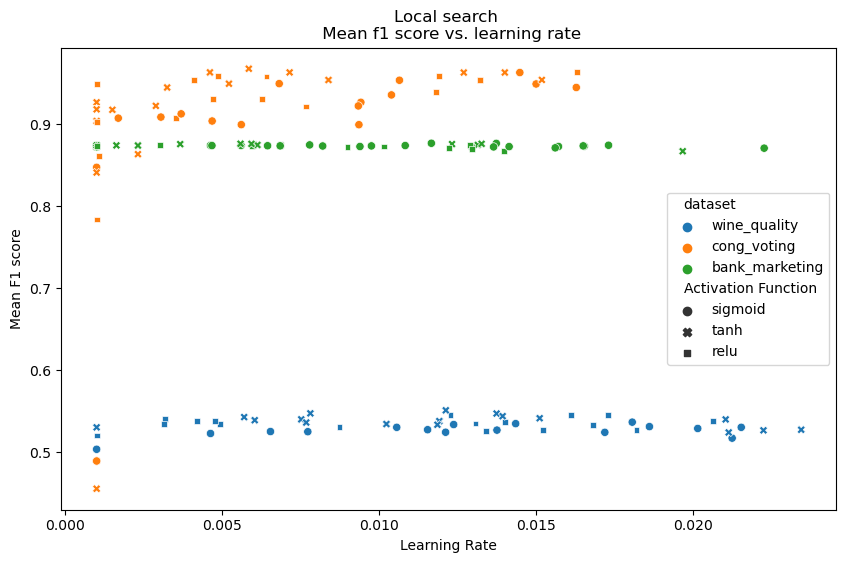

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.scatterplot(x='Learning Rate', y='Average F1', data=cv_local_search_results, hue='dataset', style='Activation Function')

plt.xlabel('Learning Rate')
plt.ylabel('Mean F1 score')
plt.title('Local search \n Mean f1 score vs. learning rate')
plt.savefig('results_plots/localsearch_f1_learning.png')
plt.show()


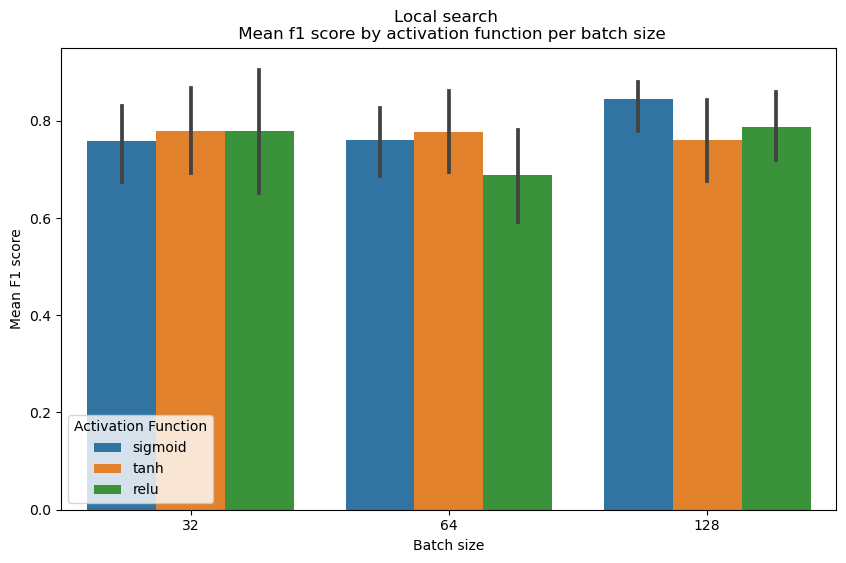

In [17]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Batch Size', y='Average F1', hue='Activation Function', data=cv_local_search_results)

plt.xlabel('Batch size')
plt.ylabel('Mean F1 score')
plt.title('Local search \n Mean f1 score by activation function per batch size')
plt.savefig('results_plots/localsearch_f1_activation_batch.png')
plt.show()


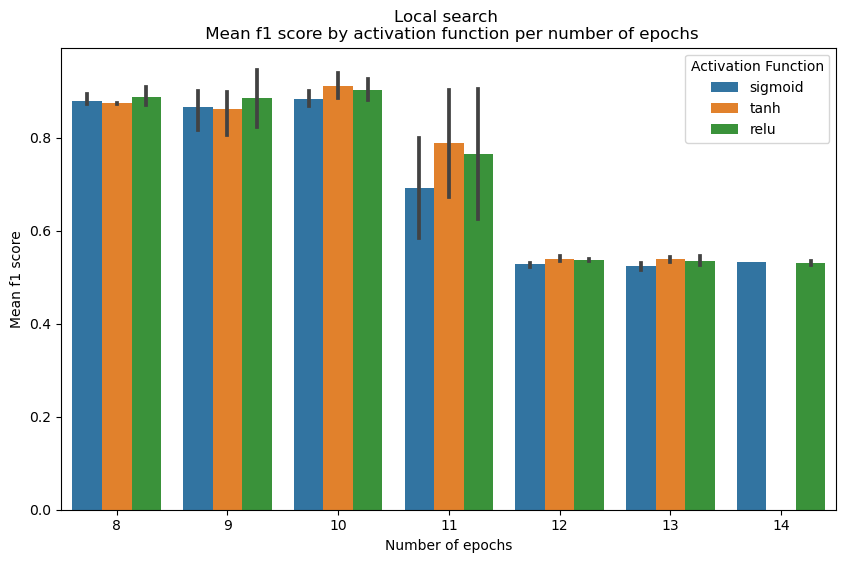

In [18]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Number of Epochs', y='Average F1', hue='Activation Function', data=cv_local_search_results)

plt.xlabel('Number of epochs')
plt.ylabel('Mean f1 score')
plt.title('Local search \n Mean f1 score by activation function per number of epochs')
plt.savefig('results_plots/localsearch_f1_activation_epochs.png')
plt.show()


### Compare local and grid search results

In [19]:
cv_grid_search_results['method'] = 'Own NN Grid Search'
cv_local_search_results['method'] = 'Own NN Local Search'

combined_NN_results = pd.concat([cv_grid_search_results, cv_local_search_results])

combined_NN_results = combined_NN_results.reset_index(drop=True)

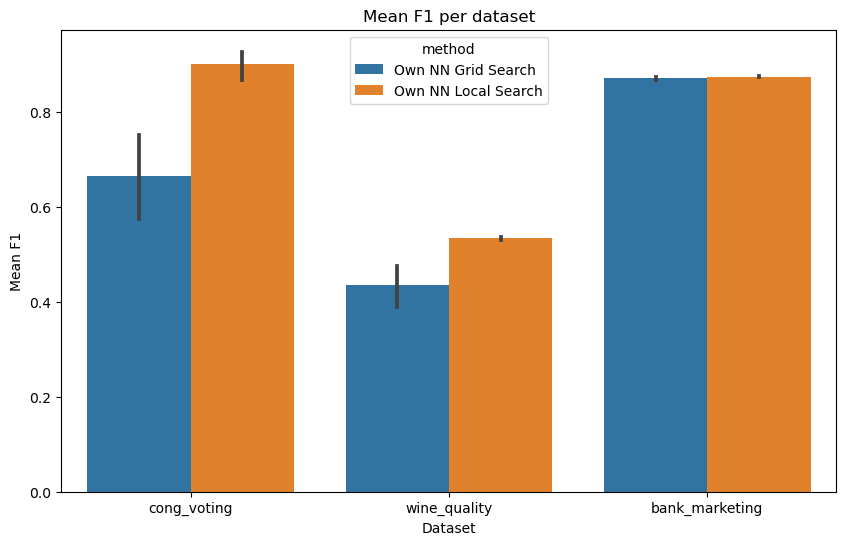

In [20]:
plt.figure(figsize=(10, 6))

sns.barplot(x='dataset', y='Average F1', hue='method', data=combined_NN_results)

plt.xlabel('Dataset')
plt.ylabel('Mean F1')
plt.title('Mean F1 per dataset')
plt.savefig('results_plots/local_grid_f1.png')
plt.show()


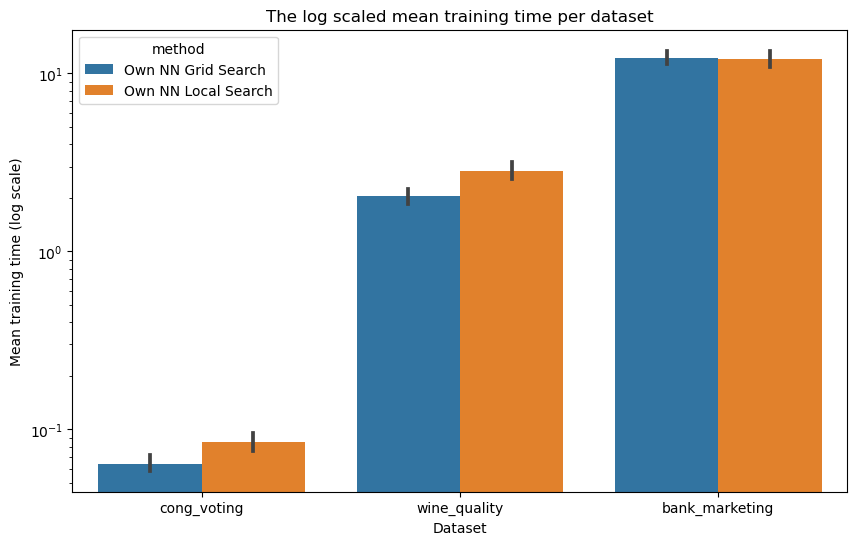

In [21]:
plt.figure(figsize=(10, 6))

sns.barplot(x='dataset', y='Average Training Time', hue='method', data=combined_NN_results, )
plt.yscale('log')
plt.xlabel('Dataset')
plt.ylabel('Mean training time (log scale)')
plt.title('The log scaled mean training time per dataset')
plt.savefig('results_plots/local_grid_time.png')
plt.show()


In [22]:
best_local_search_indices = cv_local_search_results.groupby('dataset')['Average Accuracy'].idxmax()
best_local_search = cv_local_search_results.loc[best_local_search_indices]
best_local_search

,Hidden Layer Sizes,Activation Function,Learning Rate,Batch Size,Number of Epochs,Average Accuracy,Average F1,Average Training Time,dataset,Num Hidden Layers,method
131,"[27, 33]",relu,0.010166,32,10,0.898781,0.872917,16.808335,bank_marketing,2,Own NN Local Search
65,"[25, 27]",tanh,0.005852,32,11,0.967759,0.967782,0.123304,cong_voting,2,Own NN Local Search
46,"[23, 32]",relu,0.016112,128,13,0.570572,0.545108,1.517483,wine_quality,2,Own NN Local Search


In [23]:
best_grid_search_indices = cv_grid_search_results.groupby('dataset')['Average Accuracy'].idxmax()
best_grid_search = cv_grid_search_results.loc[best_grid_search_indices]
best_grid_search

,Hidden Layer Sizes,Activation Function,Learning Rate,Batch Size,Number of Epochs,Average Accuracy,Average F1,Average Training Time,dataset,Num Hidden Layers,method
88,[10],sigmoid,0.001,64,10,0.899073,0.873104,11.253455,bank_marketing,1,Own NN Grid Search
18,"[25, 30]",tanh,0.010,64,10,0.967759,0.967731,0.058639,cong_voting,2,Own NN Grid Search
63,"[20, 25, 30]",tanh,0.010,64,10,0.568572,0.548063,3.453453,wine_quality,3,Own NN Grid Search


In [24]:
mlp_results

,method,dataset,Average F1,Average Training Time
0,MLP,wine_quality,0.467770,1.773693
1,MLP,cong_voting,0.949067,0.597549
2,MLP,bank_marketing,0.864294,2.533217


In [25]:
random_forest_results

,method,dataset,Average F1,Average Training Time
0,RandomForest,wine_quality,0.653514,1.491498
1,RandomForest,cong_voting,0.954380,0.163212
2,RandomForest,bank_marketing,0.875507,3.346496


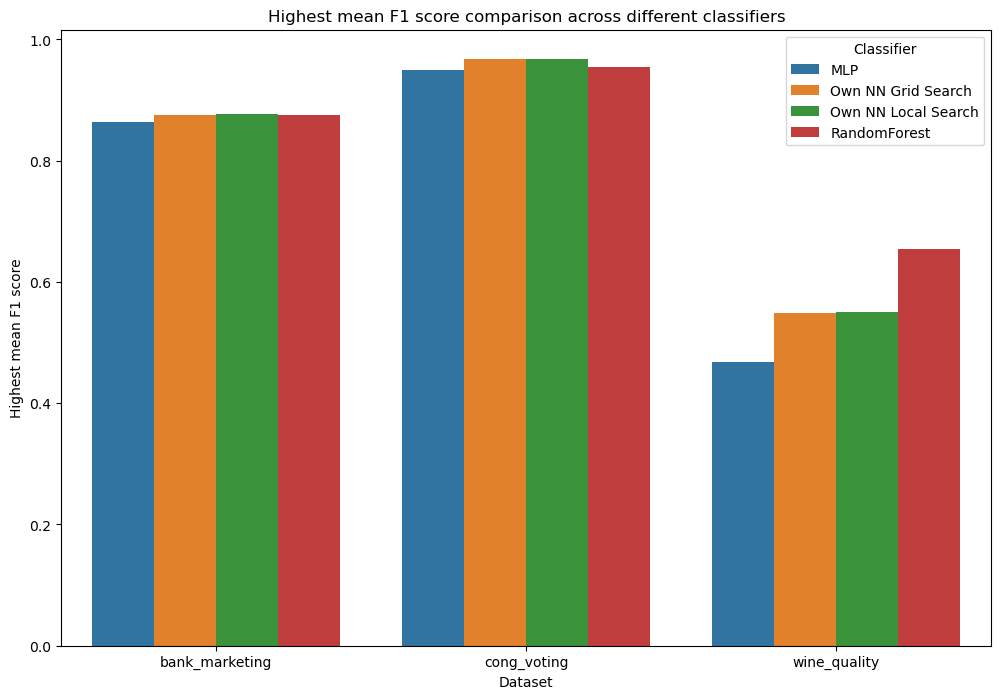

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

combined_results = pd.concat([mlp_results, cv_local_search_results, cv_grid_search_results, random_forest_results])

combined_results = combined_results.reset_index(drop=True)
combined_results = combined_results.reset_index(drop=True)

max_accuracy_indices = combined_results.groupby(['dataset', 'method'])['Average F1'].idxmax()

max_accuracy_rows = combined_results.loc[max_accuracy_indices]

plt.figure(figsize=(12, 8))

sns.barplot(x='dataset', y='Average F1', hue='method', data=max_accuracy_rows)

plt.xlabel('Dataset')
plt.ylabel('Highest mean F1 score')
plt.title('Highest mean F1 score comparison across different classifiers')
plt.legend(title='Classifier')
plt.savefig('results_plots/highest_f1_all.png')
plt.show()



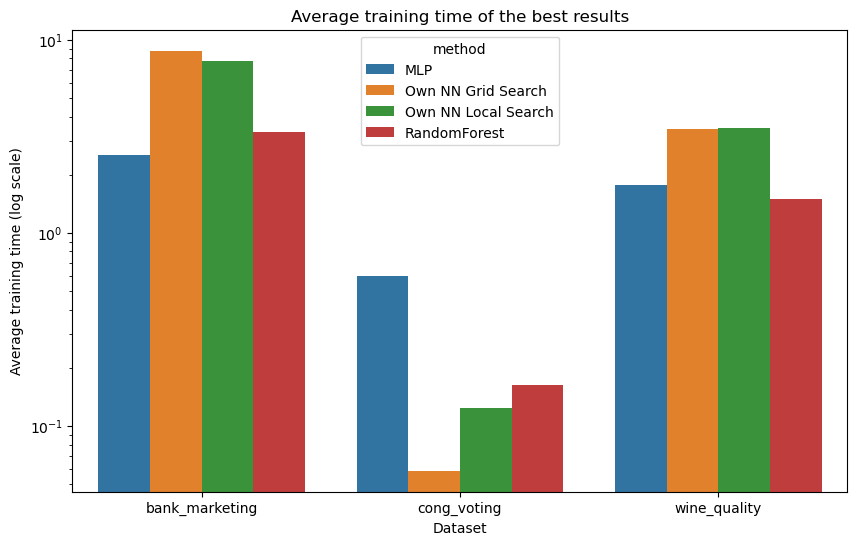

In [27]:
plt.figure(figsize=(10, 6))

sns.barplot(x='dataset', y='Average Training Time', hue='method', data=max_accuracy_rows)

plt.yscale('log') 

plt.xlabel('Dataset')
plt.ylabel('Average training time (log scale)')
plt.title('Average training time of the best results')
plt.savefig('results_plots/highestf1_time_all.png')
plt.show()


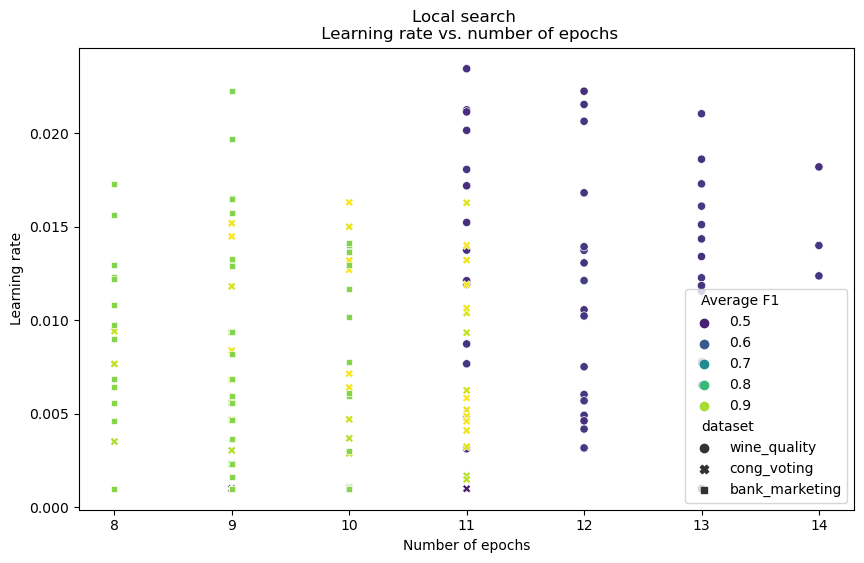

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number of Epochs', y='Learning Rate', data=cv_local_search_results, hue='Average F1', palette='viridis', style='dataset')

plt.xlabel('Number of epochs')
plt.ylabel('Learning rate')
plt.title('Local search \n Learning rate vs. number of epochs')
plt.savefig('results_plots/learningRate_NumberOfEpochs.png')
plt.show()